In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('Cleaned Engage Car.csv')

In [3]:
data.drop('Unnamed: 0', inplace = True , axis = 1)

In [4]:
data.head()

,Manufacturer,Model,Car_Name,Variant,Body_Type,Fuel_Type,Gear_Type,Drivetrain,Displacement,Cylinders,...,Torque,Fuel_tank,Height,Length,Width,Doors,Seats,Wheelbase,Airbags,On_road_price
0,Tata,Nano Genx,Tata Nano Genx,Xt,Hatchback,Petrol,Manual,RWD (Rear Wheel Drive),624,2,...,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,296764
1,Tata,Nano Genx,Tata Nano Genx,Xe,Hatchback,Petrol,Manual,RWD (Rear Wheel Drive),624,2,...,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,239757
2,Tata,Nano Genx,Tata Nano Genx,Xta,Hatchback,Petrol,Automatic,RWD (Rear Wheel Drive),624,2,...,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,339454
3,Tata,Nano Genx,Tata Nano Genx,Xm,Hatchback,Petrol,Manual,RWD (Rear Wheel Drive),624,2,...,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,276034
4,Tata,Nano Genx,Tata Nano Genx,Xma,Hatchback,Petrol,Automatic,RWD (Rear Wheel Drive),624,2,...,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,319222


In [5]:
data.shape

(986, 22)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   986 non-null    object 
 1   Model          986 non-null    object 
 2   Car_Name       986 non-null    object 
 3   Variant        986 non-null    object 
 4   Body_Type      986 non-null    object 
 5   Fuel_Type      986 non-null    object 
 6   Gear_Type      986 non-null    object 
 7   Drivetrain     986 non-null    object 
 8   Displacement   986 non-null    int64  
 9   Cylinders      986 non-null    int64  
 10  Mileage        986 non-null    float64
 11  Power          986 non-null    float64
 12  Torque         986 non-null    int64  
 13  Fuel_tank      986 non-null    float64
 14  Height         986 non-null    float64
 15  Length         986 non-null    float64
 16  Width          986 non-null    float64
 17  Doors          986 non-null    int64  
 18  Seats     

In [7]:
data.describe()

,Displacement,Cylinders,Mileage,Power,Torque,Fuel_tank,Height,Length,Width,Doors,Seats,Wheelbase,Airbags,On_road_price
count,986.00000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02
mean,1759.75355,4.222110,18.516308,141.650811,244.105477,50.927890,1583.783818,4252.510791,1775.546496,4.569980,5.266734,2606.693712,3.176471,3.480072e+06
std,925.29020,1.380193,4.590557,116.292429,162.680245,15.324225,152.897123,447.315011,144.303727,0.715081,1.085600,180.758137,2.501836,7.641723e+06
min,624.00000,2.000000,3.400000,33.530000,10.000000,24.000000,1.845000,4.640000,1.845000,2.000000,2.000000,1840.000000,0.000000,2.397570e+05
25%,1198.00000,4.000000,16.000000,81.860000,120.000000,40.000000,1495.000000,3985.000000,1695.000000,4.000000,5.000000,2470.000000,2.000000,7.327920e+05
50%,1496.00000,4.000000,18.490000,102.580000,200.000000,45.000000,1549.000000,4315.000000,1745.000000,5.000000,5.000000,2590.000000,2.000000,1.013753e+06
75%,1988.00000,4.000000,21.700000,152.880000,320.000000,60.000000,1655.000000,4568.000000,1832.000000,5.000000,5.000000,2700.000000,6.000000,2.001127e+06
max,6752.00000,12.000000,28.400000,778.210000,1712.000000,105.000000,2055.000000,5575.000000,2226.000000,5.000000,9.000000,3266.000000,14.000000,5.395527e+07


In [8]:
data.drop(['Model','Car_Name','Variant','Cylinders','Torque','Fuel_tank','Height','Length','Width','Doors','Wheelbase','Body_Type'], inplace = True, axis = 1)

In [9]:
data.head()

,Manufacturer,Fuel_Type,Gear_Type,Drivetrain,Displacement,Mileage,Power,Seats,Airbags,On_road_price
0,Tata,Petrol,Manual,RWD (Rear Wheel Drive),624,23.6,37.48,4,0,296764
1,Tata,Petrol,Manual,RWD (Rear Wheel Drive),624,23.6,37.48,4,0,239757
2,Tata,Petrol,Automatic,RWD (Rear Wheel Drive),624,21.9,37.48,4,0,339454
3,Tata,Petrol,Manual,RWD (Rear Wheel Drive),624,23.6,37.48,4,0,276034
4,Tata,Petrol,Automatic,RWD (Rear Wheel Drive),624,21.9,37.48,4,0,319222


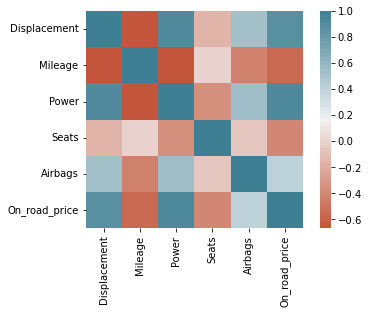

In [10]:
sns.heatmap(data.corr(), cmap = sns.diverging_palette(20,220,n=200),square = True)
plt.show()

In [11]:
data.groupby(['Manufacturer']).count()

,Fuel_Type,Gear_Type,Drivetrain,Displacement,Mileage,Power,Seats,Airbags,On_road_price
Manufacturer,,,,,,,,,
Aston Martin,2,2,2,2,2,2,2,2,2
Audi,22,22,22,22,22,22,22,22,22
Bentley,6,6,6,6,6,6,6,6,6
Bmw,32,32,32,32,32,32,32,32,32
Datsun,15,15,15,15,15,15,15,15,15
Dc,1,1,1,1,1,1,1,1,1
Ferrari,8,8,8,8,8,8,8,8,8
Fiat,21,21,21,21,21,21,21,21,21
Force,4,4,4,4,4,4,4,4,4


In [12]:
data = pd.get_dummies(data,drop_first = True)

In [13]:
data.head()

,Displacement,Mileage,Power,Seats,Airbags,On_road_price,Manufacturer_Audi,Manufacturer_Bentley,Manufacturer_Bmw,Manufacturer_Datsun,...,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Gear_Type_Automatic,Gear_Type_CVT,Gear_Type_DCT,Gear_Type_Manual,Drivetrain_AWD (All Wheel Drive),Drivetrain_FWD (Front Wheel Drive),Drivetrain_RWD (Rear Wheel Drive)
0,624,23.6,37.48,4,0,296764,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,624,23.6,37.48,4,0,239757,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,624,21.9,37.48,4,0,339454,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,624,23.6,37.48,4,0,276034,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,624,21.9,37.48,4,0,319222,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [14]:
data.columns

Index(['Displacement', 'Mileage', 'Power', 'Seats', 'Airbags', 'On_road_price',
       'Manufacturer_Audi', 'Manufacturer_Bentley', 'Manufacturer_Bmw',
       'Manufacturer_Datsun', 'Manufacturer_Dc', 'Manufacturer_Ferrari',
       'Manufacturer_Fiat', 'Manufacturer_Force', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Isuzu',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Kia',
       'Manufacturer_Lamborghini', 'Manufacturer_Land Rover',
       'Manufacturer_Land Rover Rover', 'Manufacturer_Lexus',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti Suzuki',
       'Manufacturer_Maruti Suzuki R', 'Manufacturer_Maserati',
       'Manufacturer_Mini', 'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Premier', 'Manufacturer_Renault',
       'Manufacturer_Skoda', 'Manufacturer_Tata', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Manufacturer_Volvo', 'Fuel_Type_Diesel',
  

In [15]:
data.rename(columns = {'Manufacturer_Land Rover': 'Manufacturer_Land_Rover', 'Manufacturer_Land Rover Rover':'Manufacturer_Land_Rover_Rover','Manufacturer_Maruti Suzuki':'Manufacturer_Maruti_Suzuki','Manufacturer_Maruti Suzuki R':'Manufacturer_Maruti_Suzuki_R','Drivetrain_AWD (All Wheel Drive)':'Drivetrain_AWD','Drivetrain_FWD (Front Wheel Drive)':'Drivetrain_FWD','Drivetrain_RWD (Rear Wheel Drive)':'Drivetrain_RWD'}, inplace = True)

In [16]:
data.columns

Index(['Displacement', 'Mileage', 'Power', 'Seats', 'Airbags', 'On_road_price',
       'Manufacturer_Audi', 'Manufacturer_Bentley', 'Manufacturer_Bmw',
       'Manufacturer_Datsun', 'Manufacturer_Dc', 'Manufacturer_Ferrari',
       'Manufacturer_Fiat', 'Manufacturer_Force', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Isuzu',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Kia',
       'Manufacturer_Lamborghini', 'Manufacturer_Land_Rover',
       'Manufacturer_Land_Rover_Rover', 'Manufacturer_Lexus',
       'Manufacturer_Mahindra', 'Manufacturer_Maruti_Suzuki',
       'Manufacturer_Maruti_Suzuki_R', 'Manufacturer_Maserati',
       'Manufacturer_Mini', 'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Premier', 'Manufacturer_Renault',
       'Manufacturer_Skoda', 'Manufacturer_Tata', 'Manufacturer_Toyota',
       'Manufacturer_Volkswagen', 'Manufacturer_Volvo', 'Fuel_Type_Diesel',
  

In [17]:
X = data.drop('On_road_price', axis = 1)
y = data['On_road_price']
print(X.shape)
print(y.shape)

(986, 49)
(986,)


In [18]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [19]:
model.feature_importances_

array([2.70009678e-01, 3.88480505e-02, 5.42967894e-01, 2.65967143e-02,
       1.06703074e-02, 1.97489792e-03, 1.40450652e-02, 5.27528720e-03,
       3.62751971e-07, 2.57039933e-05, 1.13119506e-02, 6.55141231e-06,
       1.33302500e-06, 1.16260731e-03, 3.29275714e-05, 1.16930373e-04,
       1.83325368e-04, 2.90734288e-03, 3.34889970e-03, 1.90675122e-06,
       5.43270861e-03, 4.67431114e-04, 4.70213928e-03, 4.76234980e-04,
       1.06982343e-04, 5.15380642e-06, 3.18547399e-07, 2.70313787e-03,
       1.08371411e-04, 9.23078371e-05, 7.94629260e-04, 2.96868125e-03,
       3.43131333e-07, 1.72997865e-06, 1.07917265e-05, 1.79423392e-04,
       7.21334645e-04, 1.05501346e-05, 2.31826374e-04, 7.57131261e-04,
       2.03119295e-03, 2.07687476e-03, 7.15923972e-03, 8.57383025e-07,
       7.78927951e-08, 1.82308910e-04, 5.82333240e-03, 3.17953099e-02,
       1.67184303e-03])

<AxesSubplot:>

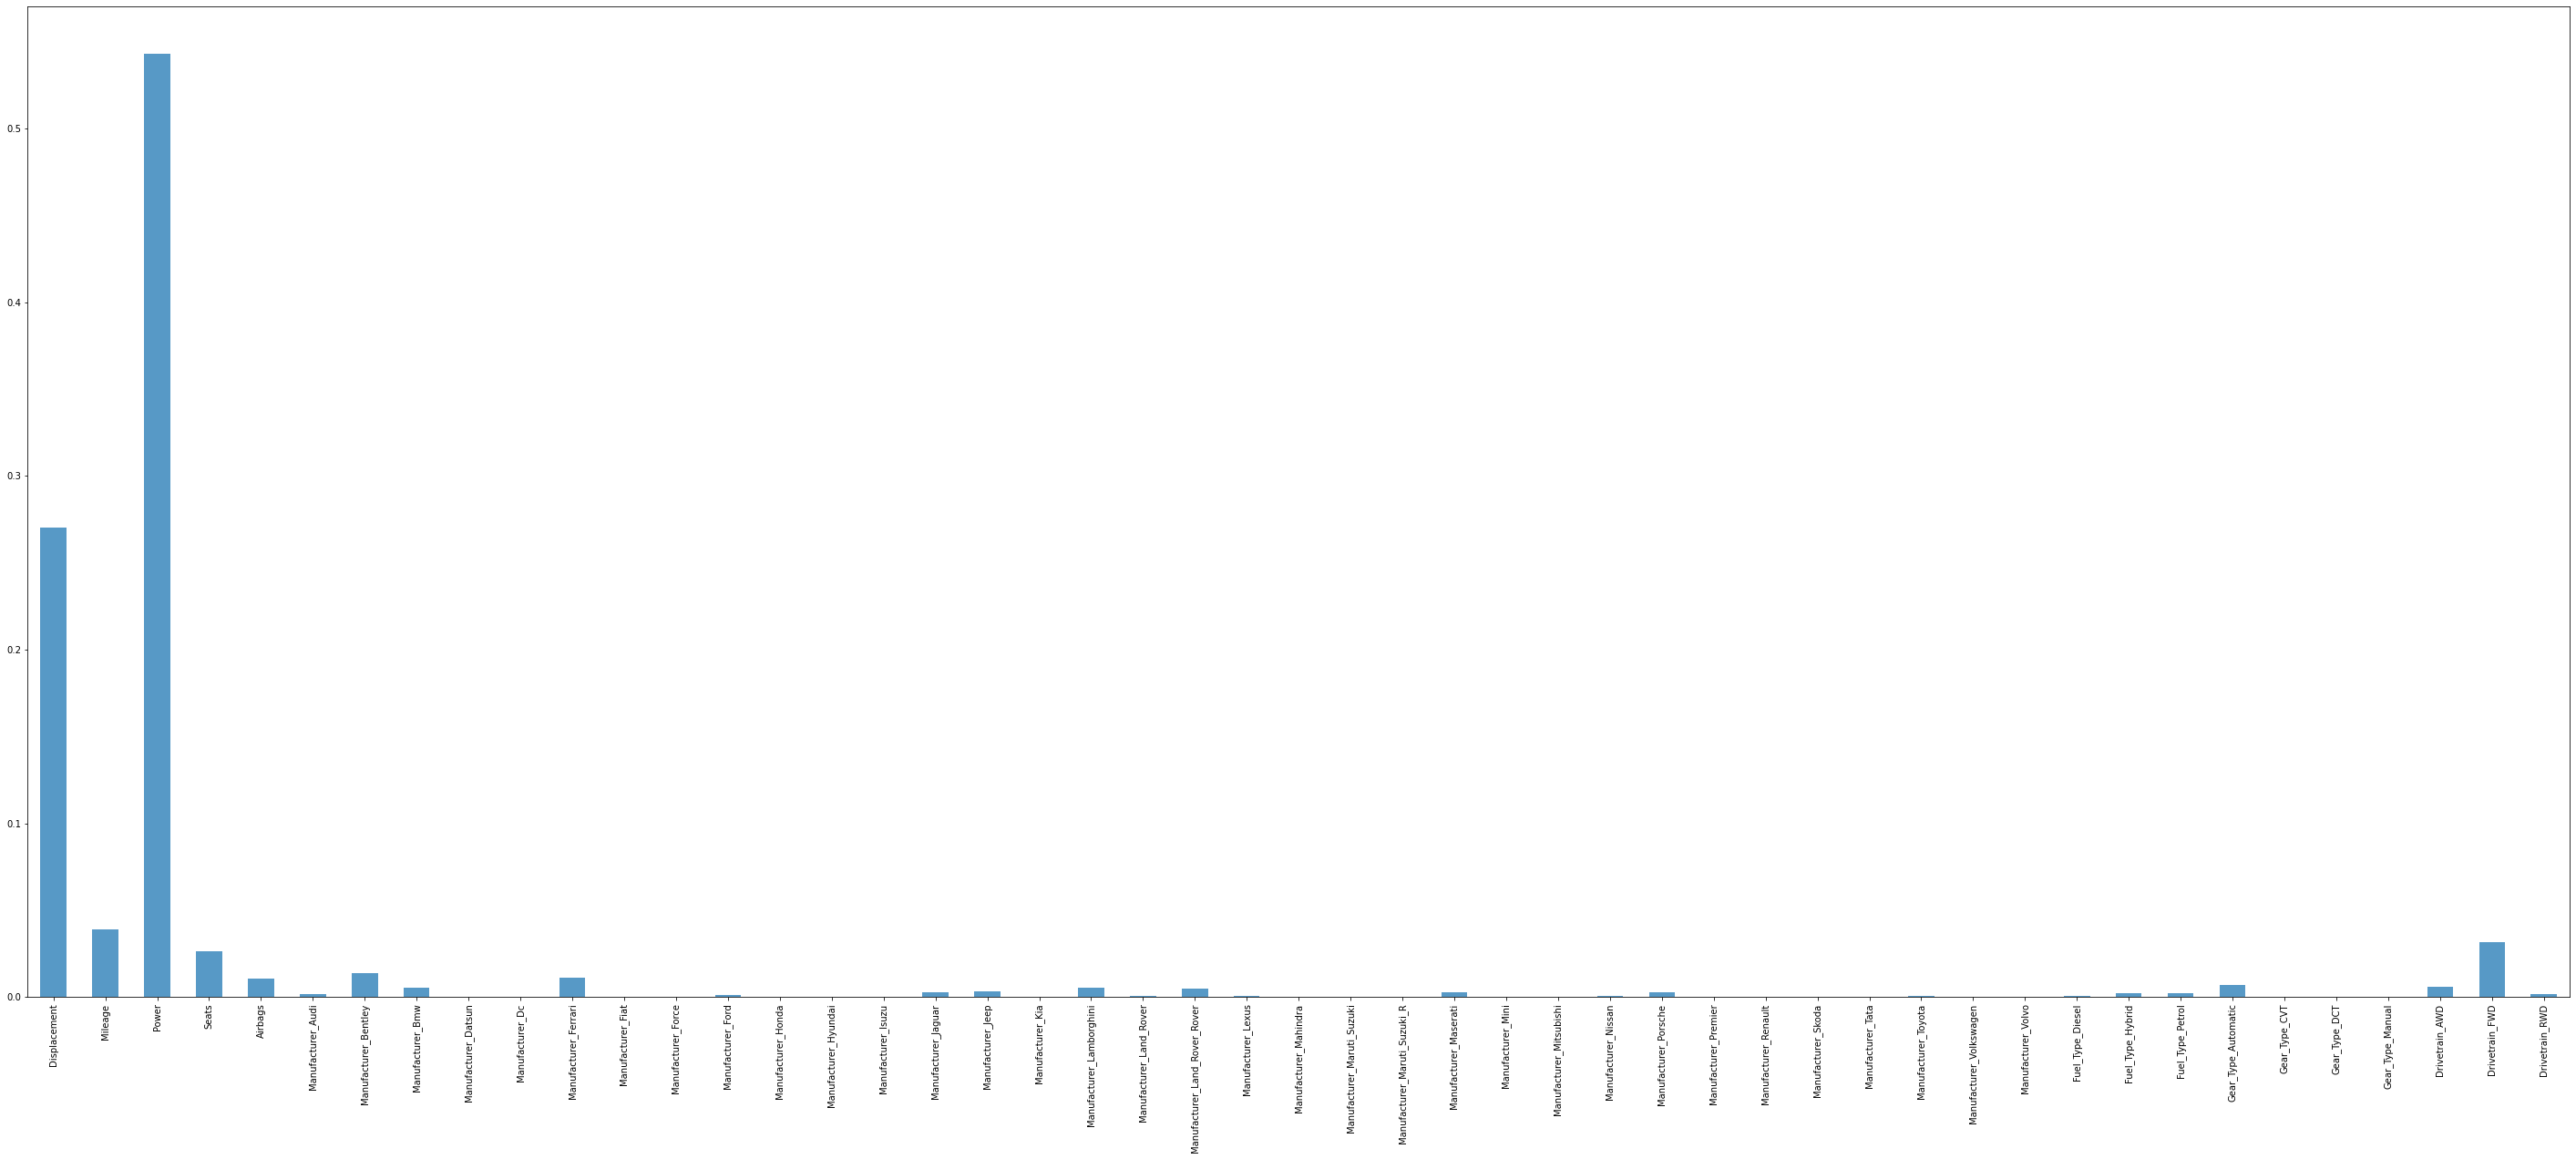

In [20]:
plt.figure(figsize=(50,20))
pd.Series(model.feature_importances_, index = X.columns).plot(kind = 'bar', alpha = 0.75 , rot = 90)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9635527456864402

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)

In [47]:
cross_val_score(LinearRegression(), X , y, cv = cv)

array([0.96355275, 0.95027558, 0.90020434, 0.92001748, 0.96651125])

In [48]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {
              'normalize': [True, False]
            }
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'mae'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        },

        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [x for x in range(20,150,20)],
                'max_features': ['auto', 'sqrt'],
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10, 15, 100],
                'min_samples_leaf': [1, 2, 5, 10]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=5)
        rs.fit(X_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [49]:
perfect_model(X,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:306: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' wa

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:

[{'normalize': True}, {'splitter': 'random', 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'mse'}, {'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}]


,model,best_score,best_params
0,Linear_Regression,0.939569,{'normalize': True}
1,Decision_Tree,0.912563,"{'splitter': 'random', 'min_samples_leaf': 1, ..."
2,Random_forest,0.952160,"{'n_estimators': 120, 'min_samples_split': 2, ..."


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [51]:
final_dec_model = DecisionTreeRegressor(splitter = 'best', min_samples_leaf = 2 , max_depth = 15 , criterion = 'absolute_error')
final_dec_model.fit(X_train, y_train)
final_dec_model.score(X_test,y_test)

0.8750172368856741

In [52]:
final_rf_model = RandomForestRegressor(n_estimators = 120 , min_samples_split = 2, min_samples_leaf = 1 , max_features='auto', max_depth=20)
final_rf_model.fit(X_train,y_train)
final_rf_model.score(X_test,y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


0.9235680321650552

In [53]:
cross_val_score(DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=15, criterion='mae'), X,y,cv=cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes

array([0.86290674, 0.93084031, 0.92140083, 0.9644921 , 0.97196278])

In [54]:
cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_features='auto', max_depth=20), X,y,cv=cv)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestR

array([0.92625949, 0.93098953, 0.84997411, 0.98238358, 0.98561057])

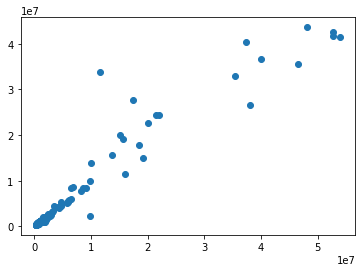

In [55]:
predictions1=final_rf_model.predict(X_test)
plt.scatter(y_test,predictions1)

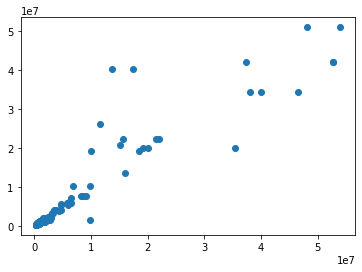

In [56]:
predictions2=final_dec_model.predict(X_test)
plt.scatter(y_test,predictions2)

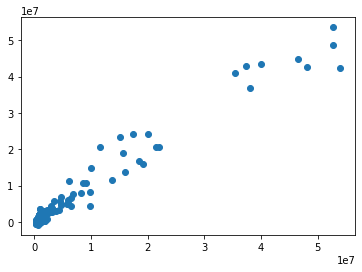

In [57]:
predictions3=model.predict(X_test)
plt.scatter(y_test,predictions3)

In [59]:
import pickle
with open('RF_model.pkl', 'wb') as file:
  # dump information to that file
  pickle.dump(final_rf_model, file)

In [60]:
np.array(data.columns)

array(['Displacement', 'Mileage', 'Power', 'Seats', 'Airbags',
       'On_road_price', 'Manufacturer_Audi', 'Manufacturer_Bentley',
       'Manufacturer_Bmw', 'Manufacturer_Datsun', 'Manufacturer_Dc',
       'Manufacturer_Ferrari', 'Manufacturer_Fiat', 'Manufacturer_Force',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Isuzu', 'Manufacturer_Jaguar', 'Manufacturer_Jeep',
       'Manufacturer_Kia', 'Manufacturer_Lamborghini',
       'Manufacturer_Land_Rover', 'Manufacturer_Land_Rover_Rover',
       'Manufacturer_Lexus', 'Manufacturer_Mahindra',
       'Manufacturer_Maruti_Suzuki', 'Manufacturer_Maruti_Suzuki_R',
       'Manufacturer_Maserati', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Premier',
       'Manufacturer_Renault', 'Manufacturer_Skoda', 'Manufacturer_Tata',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo', 'Fuel_Ty

In [61]:
data

,Displacement,Mileage,Power,Seats,Airbags,On_road_price,Manufacturer_Audi,Manufacturer_Bentley,Manufacturer_Bmw,Manufacturer_Datsun,...,Fuel_Type_Diesel,Fuel_Type_Hybrid,Fuel_Type_Petrol,Gear_Type_Automatic,Gear_Type_CVT,Gear_Type_DCT,Gear_Type_Manual,Drivetrain_AWD,Drivetrain_FWD,Drivetrain_RWD
0,624,23.60,37.48,4,0,296764,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,624,23.60,37.48,4,0,239757,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
2,624,21.90,37.48,4,0,339454,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3,624,23.60,37.48,4,0,276034,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,624,21.90,37.48,4,0,319222,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,1498,25.10,98.63,5,2,1320228,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
982,1498,25.10,98.63,5,6,1440894,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
983,1497,22.60,117.37,5,6,1451034,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
984,1497,17.80,117.37,5,2,1217814,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [62]:
dict_manufacturer = {'Tata' : 30, 'Datsun' : 3, 'Renault':28, 'Maruti Suzuki' : 20, 'Hyundai' : 10, 'Premier':27, 'Toyota' : 31,
                 'Nissan' : 25, 'Volkswagen':32, 'Ford' : 8, 'Mahindra' : 19, 'Fiat' : 6, 'Honda' : 9,
                 'Jeep' : 13,'Isuzu' : 11, 'Skoda' : 29, 'Audi': 0, 'Dc' : 4, 'Mini' : 23,
                 'Jaguar' : 12, 'Bmw' : 2, 'Porsche' : 26, 'Lexus':18, 'Maserati' : 22,'Lamborghini':15, 'Bentley' : 1,
                 'Ferrari' : 5, 'Force' : 7, 'Volvo' : 33 , 'Land Rover Rover' : 17 , 'Kia': 14, 
                 'Mitsubishi' : 24, 'Maruti Suzuki R' : 21, 'Land Rover' : 16}  

In [63]:
list_manufacturer = ['Manufacturer_Audi', 'Manufacturer_Bentley',
       'Manufacturer_Bmw', 'Manufacturer_Datsun', 'Manufacturer_Dc',
       'Manufacturer_Ferrari', 'Manufacturer_Fiat', 'Manufacturer_Force',
       'Manufacturer_Ford', 'Manufacturer_Honda', 'Manufacturer_Hyundai',
       'Manufacturer_Isuzu', 'Manufacturer_Jaguar', 'Manufacturer_Jeep',
       'Manufacturer_Kia', 'Manufacturer_Lamborghini',
       'Manufacturer_Land Rover', 'Manufacturer_Land Rover Rover',
       'Manufacturer_Lexus', 'Manufacturer_Mahindra',
       'Manufacturer_Maruti Suzuki', 'Manufacturer_Maruti Suzuki R',
       'Manufacturer_Maserati', 'Manufacturer_Mini',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_Porsche', 'Manufacturer_Premier',
       'Manufacturer_Renault', 'Manufacturer_Skoda', 'Manufacturer_Tata',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen',
       'Manufacturer_Volvo']
type(list_manufacturer)

list

In [64]:
Manufacturer_Audi = 'Maruti Suzuki'
list_feat = []
if(Manufacturer_Audi):
    for i in range(0,34):
        if (dict_manufacturer[Manufacturer_Audi] != i):
            list_feat.append(0)
        else:
            list_feat.append(1)

final_dict1 = dict(zip(list_manufacturer, list_feat))
final_dict1

{'Manufacturer_Audi': 0,
 'Manufacturer_Bentley': 0,
 'Manufacturer_Bmw': 0,
 'Manufacturer_Datsun': 0,
 'Manufacturer_Dc': 0,
 'Manufacturer_Ferrari': 0,
 'Manufacturer_Fiat': 0,
 'Manufacturer_Force': 0,
 'Manufacturer_Ford': 0,
 'Manufacturer_Honda': 0,
 'Manufacturer_Hyundai': 0,
 'Manufacturer_Isuzu': 0,
 'Manufacturer_Jaguar': 0,
 'Manufacturer_Jeep': 0,
 'Manufacturer_Kia': 0,
 'Manufacturer_Lamborghini': 0,
 'Manufacturer_Land Rover': 0,
 'Manufacturer_Land Rover Rover': 0,
 'Manufacturer_Lexus': 0,
 'Manufacturer_Mahindra': 0,
 'Manufacturer_Maruti Suzuki': 1,
 'Manufacturer_Maruti Suzuki R': 0,
 'Manufacturer_Maserati': 0,
 'Manufacturer_Mini': 0,
 'Manufacturer_Mitsubishi': 0,
 'Manufacturer_Nissan': 0,
 'Manufacturer_Porsche': 0,
 'Manufacturer_Premier': 0,
 'Manufacturer_Renault': 0,
 'Manufacturer_Skoda': 0,
 'Manufacturer_Tata': 0,
 'Manufacturer_Toyota': 0,
 'Manufacturer_Volkswagen': 0,
 'Manufacturer_Volvo': 0}

In [65]:
Manufacturer_Audi = list_feat[0]
Manufacturer_Bentley = list_feat[1]
Manufacturer_Bmw = list_feat[2]
Manufacturer_Datsun = list_feat[3]
Manufacturer_Dc = list_feat[4]
Manufacturer_Ferrari = list_feat[5]
Manufacturer_Fiat = list_feat[6]
Manufacturer_Force = list_feat[7]
Manufacturer_Ford = list_feat[8]
Manufacturer_Honda = list_feat[9]
Manufacturer_Hyundai = list_feat[10]
Manufacturer_Isuzu = list_feat[11]
Manufacturer_Jaguar = list_feat[12]
Manufacturer_Jeep = list_feat[13]
Manufacturer_Kia = list_feat[14]
Manufacturer_Lamborghini = list_feat[15]
Manufacturer_Land_Rover = list_feat[16]
Manufacturer_Land_Rover_Rover = list_feat[17]
Manufacturer_Lexus = list_feat[18]
Manufacturer_Mahindra = list_feat[19]
Manufacturer_Maruti_Suzuki = list_feat[20]
Manufacturer_Maruti_Suzuki_R = list_feat[21]
Manufacturer_Maserati = list_feat[22]
Manufacturer_Mini = list_feat[23]
Manufacturer_Mitsubishi = list_feat[24]
Manufacturer_Nissan = list_feat[25]
Manufacturer_Porsche = list_feat[26]
Manufacturer_Premier = list_feat[27]
Manufacturer_Renault = list_feat[28]
Manufacturer_Skoda = list_feat[29]
Manufacturer_Tata = list_feat[30]
Manufacturer_Toyota = list_feat[31]
Manufacturer_Volkswagen = list_feat[32]
Manufacturer_Volvo = list_feat[33]